In [1]:
import math
import random as rand
import numpy as np
from typing import Callable , Tuple, List
import matplotlib.pyplot as plt
from numba import njit
from numba.typed import List
from itertools import permutations

In [2]:
@njit
def footman(arr: np.ndarray, sorted_arr: np.ndarray) -> int:
    return np.sum(np.abs(arr - sorted_arr))

In [3]:
@njit
def bubble_1(arr: np.ndarray) -> tuple:
    n = len(arr)
    sorted_order = np.arange(n)
    scores = List()          

    for _ in range(n - 1):
        scores.append(footman(arr, sorted_order))
        for j in range(n - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]

    return scores

In [4]:
@njit
def bubble_2(arr: np.ndarray) -> tuple:
    n = len(arr)
    sorted_order = np.arange(n)
    scores = List()          
    swapped = True

    while swapped:
        swapped = False
        scores.append(footman(arr, sorted_order))
        for j in range(n - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                swapped = True
        n -= 1

    return scores



In [5]:
@njit
def bubble_3(arr: np.ndarray) -> tuple:
    n = len(arr)
    sorted_order = np.arange(n)
    scores = List()          
    swapped = True

    while swapped:
        swapped = False
        scores.append(footman(arr, sorted_order))
        for j in range(n - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                swapped = True
        n -= 1

    return scores


In [6]:
@njit
def bubble_4(arr: np.ndarray) -> tuple:
    n = len(arr)
    sorted_order = np.arange(n)
    scores = List()          
    swapped = True
    while swapped:
        swapped = False
        new_n = 0
        scores.append(footman(arr, sorted_order))
        for j in range(n - 1):
            first_num = arr[j]
            second_num = arr[j + 1]
            if first_num > second_num:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                swapped = True
                new_n = j
        n = new_n + 1
    return scores

In [7]:
def sim(arr_size: int, sort_func: Callable = None) -> np.ndarray:
    scores_of_scores = []
    arr = np.arange(arr_size)
    perms = permutations(arr)

    for p in perms:
        scores = sort_func(np.array(p))
        scores_of_scores.append(scores)

    max_len = max(len(s) for s in scores_of_scores)
    padded_scores = np.array([
        np.pad(s, (0, max_len - len(s)), 'edge') for s in scores_of_scores
    ])

    return padded_scores

In [8]:
def calc_score_worst(n:int , m:int):
    count = 0
    for i in range(0,n-m): # summation from i = 0 to i = n - m - 1
        score = abs(n-m-((2*i) + 1))
        count += score
    return count


In [9]:
calc_score_worst(1000,0)

500000

In [18]:
def plot_algorithms(
    functions: List[Callable],
    names: List[str],
    arr_size: int,
    include_worst: bool = True
    ):
    assert len(functions) == len(names), "Each function must have a corresponding name"

    colors = ['blue', 'green', 'red', 'purple', 'orange']
    x_vals = np.arange(arr_size)
    
    for i, (func, name) in enumerate(zip(functions, names)):
        scores = sim(arr_size, sort_func=func)
        sorted_score = np.sort(scores, axis = 0)


        plt.fill_between(
            np.arange(sorted_score[0].size),
            sorted_score[-1],
            color = colors[i%len(colors)],
            alpha = 0.2
        )

        mean_scores = np.mean(scores, axis=0)
        plt.plot(
            np.arange(sorted_score[0].size),
            mean_scores,
            color=colors[i % len(colors)],
            linewidth=2,
            label=f"{name} mean"
        )
        for x, y in zip(np.arange(sorted_score[0].size - 1), mean_scores[:-1]):
            plt.text(
                x+0.1, y + 0.5,
                f"{y:.1f}",
                ha='center',
                va='bottom',
                fontsize=8,
                color=colors[i % len(colors)],
                rotation=0
            )

    if include_worst:
        worst_scores = [calc_score_worst(arr_size, m) for m in x_vals]
        plt.plot(
            x_vals,
            worst_scores,
            color='black',
            linestyle='--',
            linewidth=2,
            label="Worst-case Spearman Footrule"
        )
        for x, y in zip(x_vals, worst_scores):
            plt.text(
                x+0.1, y + 0.5,
                f"{y:.0f}",
                ha='center', va='bottom',
                fontsize=8, color='black', rotation=0
            )

    plt.xlabel('Sorting Step')
    plt.ylabel('Score')
    plt.title('Sorting Algorithms Comparison')
    plt.legend()
    plt.grid(True)
    plt.text(
    0.01, 0.01,
    f"Array Size: {arr_size}",
    transform=plt.gca().transAxes
)
    plt.tight_layout()
    plt.savefig(f'bubble_plot/size_{arr_size}.png')
    plt.show()


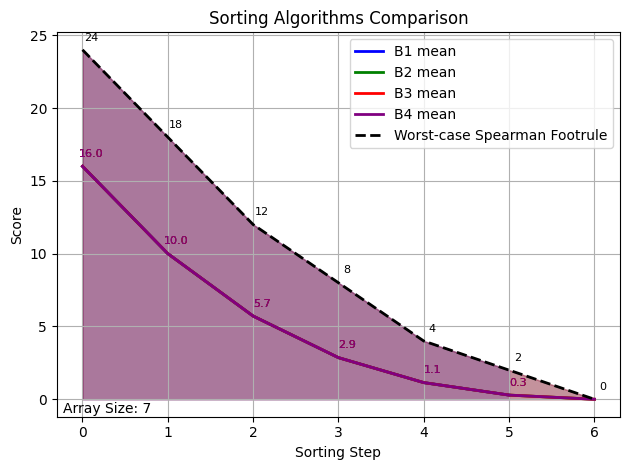

In [19]:
plot_algorithms([bubble_1,bubble_2, bubble_3, bubble_4], 
                ["B1" , "B2" , "B3" , "B4"],
                arr_size=7)

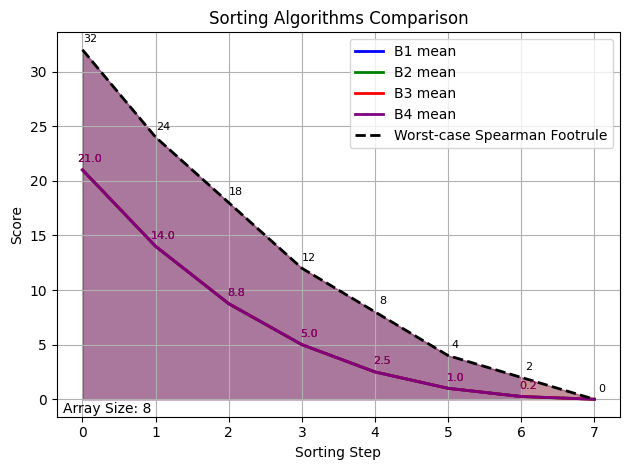

In [20]:
plot_algorithms([bubble_1,bubble_2, bubble_3, bubble_4], 
                ["B1" , "B2" , "B3" , "B4"],
                arr_size=8)

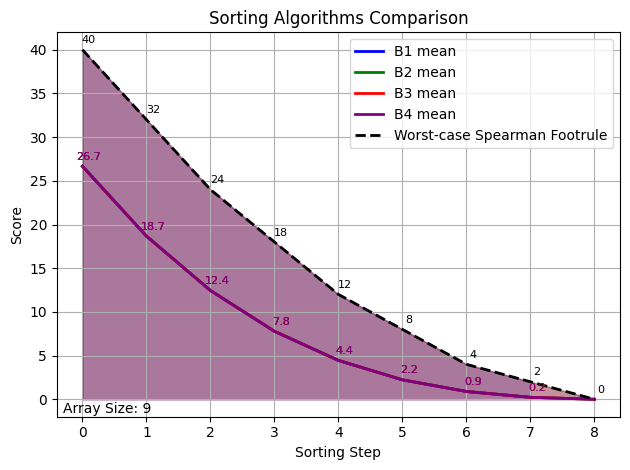

In [21]:
plot_algorithms([bubble_1,bubble_2, bubble_3, bubble_4], 
                ["B1" , "B2" , "B3" , "B4"],
                arr_size=9)

In [ ]:
plot_algorithms([bubble_1,bubble_2, bubble_3, bubble_4], 
                ["B1" , "B2" , "B3" , "B4"],
                arr_size=10)